In [13]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
#rtatman_english_word_frequency_path = kagglehub.dataset_download('rtatman/english-word-frequency')
#bilalelebi_dataset_path = kagglehub.dataset_download('bilalelebi/dataset')

print('Data source import complete.')


Data source import complete.


In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


etymology = pd.read_csv('etymology.csv')
display(etymology)

,term_id,lang,term,reltype,related_term_id,related_lang,related_term,position,group_tag,parent_tag,parent_position
0,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,group_derived_root,NaN,NaN,NaN,0.0,0IIU6TlkSA2D7dg1PfxGOw,NaN,NaN
1,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,borrowed_from,fhl-sdgwXaWvYD8CgaKXpQ,Latin,thēsaurus,0.0,NaN,0IIU6TlkSA2D7dg1PfxGOw,0.0
2,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,derived_from,7Rf1835bWYmlH9VnyYVbpg,Ancient Greek,θησαυρός,0.0,NaN,0IIU6TlkSA2D7dg1PfxGOw,1.0
3,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,doublet_with,sqiifJX3XIOQ0vZ0trzRaA,English,treasure,0.0,NaN,NaN,NaN
4,iwDzanYmWxaUKbOlUy2yyQ,Latin,thesaurus,derived_from,7Rf1835bWYmlH9VnyYVbpg,Ancient Greek,θησαυρός,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
209809,Qdr1HBH9WA-z2pnUisOVnw,English,bloom,inherited_from,KMwI3YLcW_OmL7Db3i01kA,Proto-Germanic,*blōmô,0.0,NaN,_UA3T6odTomKLcJL7OE2PA,2.0
209810,Qdr1HBH9WA-z2pnUisOVnw,English,bloom,group_related_root,NaN,NaN,NaN,0.0,0UNirIeHQKSexnwN6C-n1Q,NaN,NaN
209811,Qdr1HBH9WA-z2pnUisOVnw,English,bloom,cognate_of,mP55EahGVNitUIFKjJvpzA,West Frisian,blom,0.0,NaN,0UNirIeHQKSexnwN6C-n1Q,0.0
209812,Qdr1HBH9WA-z2pnUisOVnw,English,bloom,cognate_of,bFISoOmMWJq5-Emg16a9ng,Dutch,bloem,0.0,NaN,0UNirIeHQKSexnwN6C-n1Q,1.0


In [15]:
gs = etymology.groupby("reltype").sum()
gs

,term_id,lang,term,related_term_id,related_lang,related_term,position,group_tag,parent_tag,parent_position
reltype,,,,,,,,,,
abbreviation_of,Hwq0PRMgW6qyHkoNUIaqBASFCndbZkVxKj4lVr5FVRxAoy...,EnglishSpanishEnglishFrenchFrenchFrenchEnglish...,catAFAQCECECEportUdSSRpiptovertvertlocoad libg...,A2TRacOyWdiWZtS1k3rG4wTaIqpiDSVNOOnj-69OcXDQT8...,EnglishSpanishEnglishFrenchFrenchFrenchEnglish...,caterpillaralfilfrequently asked questionsComm...,0.0,0,VELL73t1Sciu_-VhaLk_RQGsRBBlyyQOeVksAefW_gxg,1.0
back-formation_from,N_DJBK0xUJWs3GSy_nMezgHd58g2BoUxOrOCyi_1XePQY6...,EnglishEnglishEnglishEnglishEnglishEnglishEngl...,abbreviateabductabeyantabnegateabominateabscis...,VIjiwiMFVYisUU-L4kl2qARN0ipcstUda8aEk0Wo8lWwx3...,EnglishEnglishEnglishEnglishEnglishEnglishEngl...,abbreviationabductionabeyanceabnegationabomina...,0.0,0,AFVeDf7PTk2nxIzZxqQmgwIw3qvqi-TQSmKea4i0SYXQUu...,0.0
blend_of,HzFkddJSWb-PN7VT3JohzgHzFkddJSWb-PN7VT3Johzg2B...,EsperantoEsperantoEnglishEnglishEnglishEnglish...,VikipedioVikipedioswopswopmouse potatomouse po...,4lQ0XLZJWimTndz-yg1-DwgE6Ys9FFVjGfbZ18NuhuwguO...,EsperantoEsperantoEnglishEnglishEnglishEnglish...,vikioenciklopedioswinghip-hopmousecouch potato...,116.0,0,Zi_hYjxDRAOl14n_-rKllAZi_hYjxDRAOl14n_-rKllA3b...,0.0
borrowed_from,8_rYLlLyVOKJlGFPZIvpVABuO_dtS5XKenvDCLQimf5wS2...,EnglishEnglishEnglishLatinEnglishDutchFrenchRo...,thesaurusportmanteauencyclopediaencyclopaediad...,fhl-sdgwXaWvYD8CgaKXpQoJ3zx8hYXials2kAAjz5gQyU...,LatinFrenchNew LatinAncient GreekMedieval Lati...,thēsaurusportemanteauencyclopaediaἐγκυκλοπαιδε...,0.0,0,0IIU6TlkSA2D7dg1PfxGOwQrj8AH3fQwCGRuUYYo7Gxgx6...,733.0
calque_of,HzFkddJSWb-PN7VT3JohzgZIAyBVenUgubxmCFuhXhZALr...,EsperantoEnglishEnglishEnglishDanishEnglishEng...,Vikipediofalse friendAchilles tendonmedicinema...,Iomy5fqcW_-n9REkEyMtCgwPPJUAvFXYqHh4ZJBcXDMgtA...,EnglishFrenchNew LatinOjibweGermanOld NorseOld...,Wikipediafaux-amiAchillis tendomashkikimanÍsla...,0.0,0,DyWmo9-wT96PR8qhA7Np_QjPiMfAyeTuCbDKDZi8mLwgql...,12.0
clipping_of,NSpgE_eIU1e859Kf1SdU-AIRFN99YSXK-82ErXRT2ebQs-...,EnglishEnglishEnglishEnglishEnglishEnglishGuar...,pondabandraptorbonehethetoopseudoishundbotbumf...,XjSGdZkCU9iriaXPfChuVA5SD0bbp8W-GfguCSrOSsUQSA...,EnglishEnglishEnglishEnglishEnglishEnglishGuar...,ponderabandonvelociraptortromboneheterosexualh...,0.0,0,RrIcxigtQGuRNqS9qUQ6yQzDxvkBVUT5qyv28sPg1aZgjY...,5.0
cognate_of,ITX7DSehXy-a1JmLPHNM1wITX7DSehXy-a1JmLPHNM1wIT...,GermanGermanGermanPennsylvania GermanPennsylva...,freifreifreifreifreifreiwoordenboekwoordenboek...,wdoCGqFLW9Gbp2wv7sXHjwQpJ9h0UIVrW52jhQ0floYwdf...,DutchEnglishDanishGermanDutchEnglishWest Frisi...,vrijfreefrifreivrijfreewurdboekWoordenbookWört...,0.0,0,30gepkKqQRWH3l-sw3G9qg30gepkKqQRWH3l-sw3G9qg30...,43954.0
compound_of,z9Hy4gRvXC-zkAILtF64iQz9Hy4gRvXC-zkAILtF64iQz9...,EnglishEnglishEnglishEnglishAfrikaansAfrikaans...,floccinaucinihilipilificationfloccinaucinihili...,5OB0mrQ3WPaiqb85ffiEqQWQuAuS5NUqKGEvRn2y4HggDI...,LatinLatinLatinLatinAfrikaansAfrikaansDutchDut...,floccusnaucumnihilumpilusaardewolfaardwolfavbe...,1247.0,0,wm3dOzX4SFez2zXhOcyCWAwm3dOzX4SFez2zXhOcyCWAwm...,116.0
derived_from,8_rYLlLyVOKJlGFPZIvpVAiwDzanYmWxaUKbOlUy2yyQS2...,EnglishLatinEnglishEnglishEnglishSranan TongoO...,thesaurusthesaurusencyclopediaencyclopediadict...,7Rf1835bWYmlH9VnyYVbpg7Rf1835bWYmlH9VnyYVbpgcA...,Ancient GreekAncient GreekAncient GreekKoine G...,θησαυρόςθησαυρόςἐγκυκλοπαιδείαἐγκύκλιος παιδεί...,0.0,0,0IIU6TlkSA2D7dg1PfxGOwiBhFJLNZQQuH2BQr2bVb_gGi...,23206.0


In [16]:
etymology.columns

Index(['term_id', 'lang', 'term', 'reltype', 'related_term_id', 'related_lang',
       'related_term', 'position', 'group_tag', 'parent_tag',
       'parent_position'],
      dtype='object')

In [17]:
df = etymology[etymology['lang'] == 'English']
engl = df.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)
display(engl)

,term,reltype,related_lang,related_term
0,thesaurus,group_derived_root,NaN,NaN
1,thesaurus,borrowed_from,Latin,thēsaurus
2,thesaurus,derived_from,Ancient Greek,θησαυρός
3,thesaurus,doublet_with,English,treasure
5,portmanteau,has_root,Proto-Indo-European,*per- (fare)
...,...,...,...,...
209809,bloom,inherited_from,Proto-Germanic,*blōmô
209810,bloom,group_related_root,NaN,NaN
209811,bloom,cognate_of,West Frisian,blom
209812,bloom,cognate_of,Dutch,bloem


In [18]:
engl['related_lang'].value_counts().median()
engl['reltype'].unique()

array(['group_derived_root', 'borrowed_from', 'derived_from',
       'doublet_with', 'has_root', 'group_affix_root',
       'etymologically_related_to', 'group_related_root',
       'inherited_from', 'cognate_of', 'abbreviation_of', 'clipping_of',
       'has_affix', 'is_onomatopoeic', 'compound_of',
       'has_prefix_with_root', 'has_suffix', 'has_confix', 'calque_of',
       'blend_of', 'has_prefix', 'back-formation_from',
       'learned_borrowing_from', 'unadapted_borrowing_from',
       'named_after', 'orthographic_borrowing_from', 'semantic_loan_of',
       'initialism_of'], dtype=object)

In [19]:
# (engl['related_lang'] != 'English')
related_counts = engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()
piechart_lst = related_counts[related_counts >= 150]
other = pd.Series({'Other': engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()[engl['related_lang'].value_counts() < 150].sum()})
piechart_series = pd.concat([piechart_lst, other])
piechart_series

,0
Latin,548
French,522
Middle French,197
Italian,184
Other,489


<Axes: title={'center': 'Number of English Words Borrowed from Each Language'}>

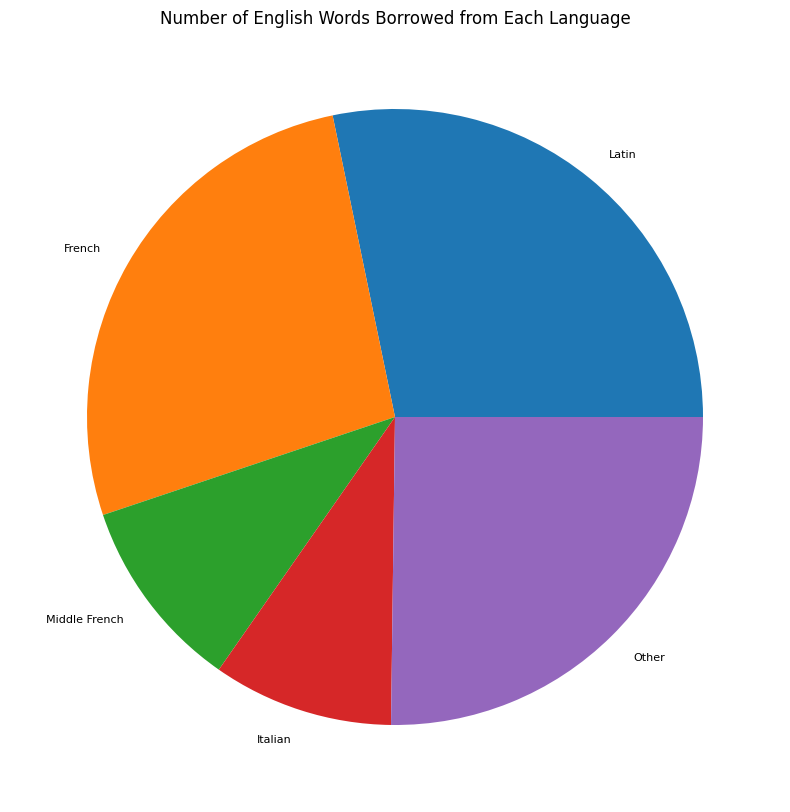

In [20]:
piechart_series.plot.pie(figsize = (10, 10), title = 'Number of English Words Borrowed from Each Language', fontsize = 8)

In [21]:
engl[engl['term'] == 'the']

,term,reltype,related_lang,related_term
4957,the,group_derived_root,NaN,NaN
4958,the,inherited_from,Middle English,the
4959,the,inherited_from,Old English,þē
4960,the,etymologically_related_to,Old English,sē
4961,the,group_related_root,NaN,NaN
4962,the,etymologically_related_to,Old English,sē
4963,the,etymologically_related_to,Old English,sēo
4964,the,etymologically_related_to,Old English,þæt
4965,the,etymologically_related_to,Old English,þā
4966,the,etymologically_related_to,Old English,sē


In [22]:
freqs = pd.read_csv('unigram_freq.csv')
freqs.set_index('word', inplace = True)
freqs

,count
word,
the,23135851162
of,13151942776
and,12997637966
to,12136980858
a,9081174698
...,...
gooek,12711
gooddg,12711
gooblle,12711


In [23]:
# engl['frequency'] = engl['term'].apply(lambda word: freqs.loc[word] if (word in freqs.index) else -1)
df = engl.set_index('term').join(freqs).sort_values('count', ascending = False).dropna(subset = ['count'])
df['freq'] = df['count'] / freqs['count'].sum()
df

,reltype,related_lang,related_term,count,freq
term,,,,,
the,group_related_root,NaN,NaN,2.313585e+10,3.933838e-02
the,inherited_from,Old English,þȳ,2.313585e+10,3.933838e-02
the,group_related_root,NaN,NaN,2.313585e+10,3.933838e-02
the,cognate_of,Sanskrit,sá,2.313585e+10,3.933838e-02
the,cognate_of,Ancient Greek,ὁ,2.313585e+10,3.933838e-02
...,...,...,...,...,...
azote,borrowed_from,French,azote,1.284100e+04,2.183382e-08
azote,group_derived_root,NaN,NaN,1.284100e+04,2.183382e-08
accessorial,has_prefix_with_root,English,accessory,1.281500e+04,2.178961e-08


In [31]:
from scipy.stats import chi2_contingency

# load csv
df = pd.read_csv("etymology.csv")
reltype_counts = df['reltype'].value_counts()
reltype_counts

,count
reltype,
etymologically_related_to,138279
derived_from,126076
inherited_from,119702
cognate_of,101759
group_derived_root,85700
borrowed_from,54161
group_related_root,44462
has_prefix_with_root,38833
has_affix,37432


Chi-square statistic: 705635.7353948058
p-value: 0.0


Text(0.5, 1.0, 'Distribution of relationship types')

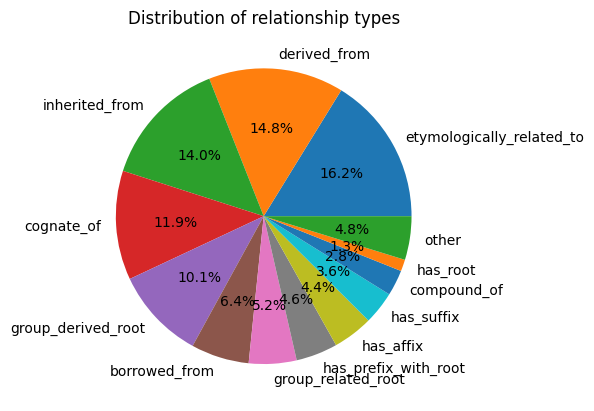

In [36]:
# hypothesis test
observed = reltype_counts.values
n = sum(observed)
k = len(observed)
expected = np.array([n/k] * k)
chi2, p_value = chi2_contingency([observed, expected])[0:2]

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

# pie chart
other = 0
labels = []
values = []

for reltype in reltype_counts.index:
  percent = 100 * (reltype_counts[reltype] / len(df))
  if percent < 1.2:
    other += percent
  else:
    labels.append(reltype)
    values.append(percent)

plt.pie([*values, other], labels=[*labels, "other"], autopct='%1.1f%%')
plt.title("Distribution of relationship types")



Text(0, 0.5, 'Occurences')

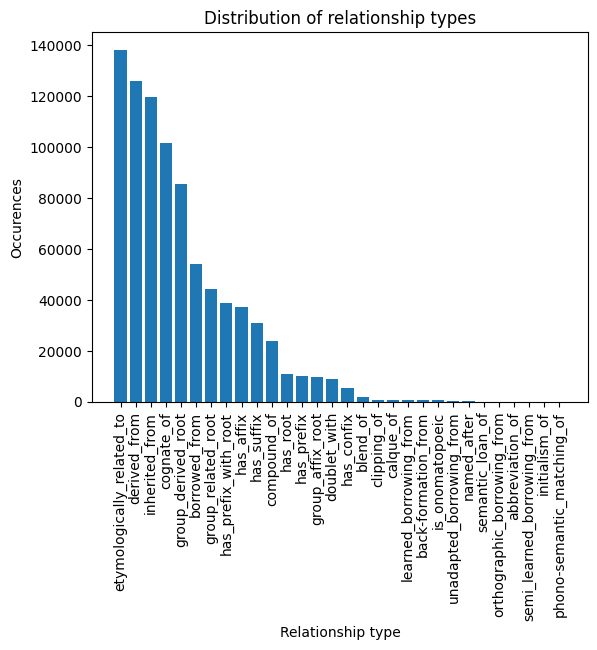

In [38]:
# bar chart
#plt.bar([*labels, "other"], list(map(lambda x: (len(df) * (x / 100)), [*values, other])))
plt.bar(reltype_counts.index, reltype_counts.values)
plt.xticks(rotation=90)
plt.title("Distribution of relationship types")
plt.xlabel("Relationship type")
plt.ylabel("Occurences")

Text(0, 0.5, 'Occurences')

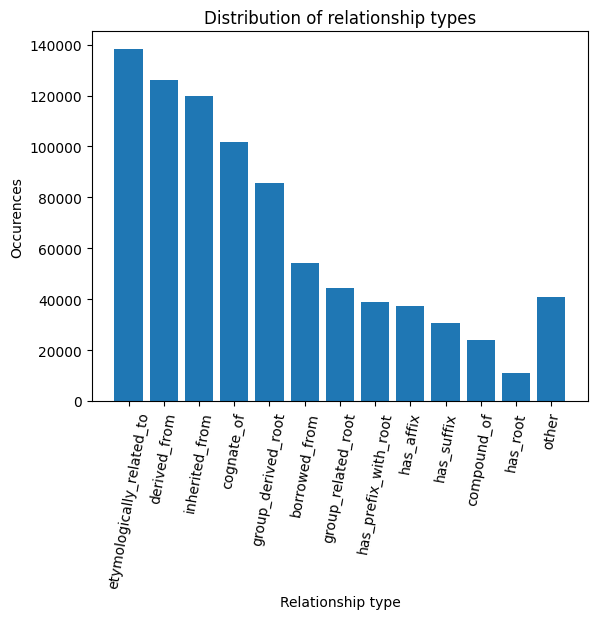

In [42]:
plt.bar([*labels, "other"], list(map(lambda x: (len(df) * (x / 100)), [*values, other])))
plt.xticks(rotation=80)
plt.title("Distribution of relationship types")
plt.xlabel("Relationship type")
plt.ylabel("Occurences")